<a href="https://colab.research.google.com/github/marcelcerri/biorreatores/blob/main/Crescimento_Microbiano_Monod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

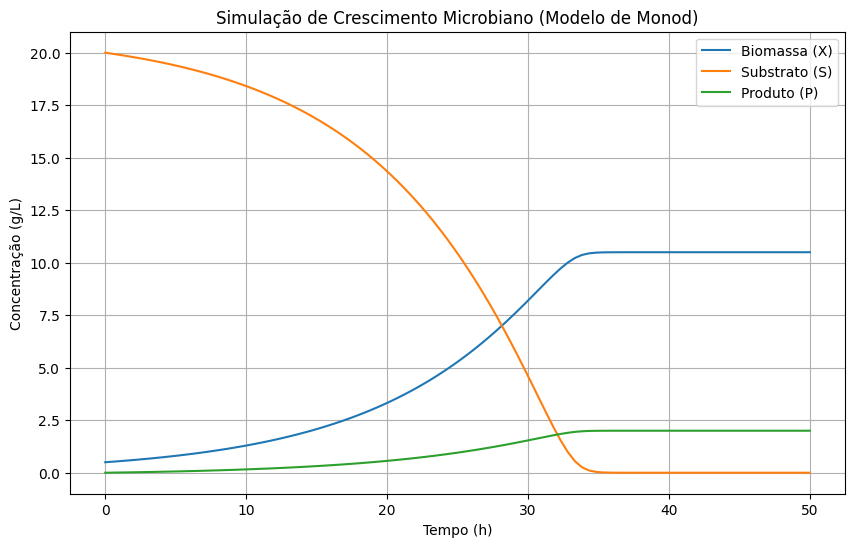

      Tempo  Biomassa (X)  Substrato (S)  Produto (P)
0    0.0000        0.5000        20.0000       0.0000
1    0.5051        0.5246        19.9507       0.0049
2    1.0101        0.5505        19.8990       0.0101
3    1.5152        0.5776        19.8448       0.0155
4    2.0202        0.6060        19.7879       0.0212
..      ...           ...            ...          ...
95  47.9798       10.5000        -0.0000       2.0000
96  48.4848       10.5000        -0.0000       2.0000
97  48.9899       10.5000        -0.0000       2.0000
98  49.4949       10.5000        -0.0000       2.0000
99  50.0000       10.5000        -0.0000       2.0000

[100 rows x 4 columns]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros do Modelo de Monod
mumax = 0.1  # Taxa máxima específica de crescimento (h^-1)
Ks = 1  # Constante de saturação (g/L)
Yxs = 0.5  # Coeficiente de rendimento de biomassa/substrato (g/g)
Ypx = 0.2  # Coeficiente de rendimento de produto/biomassa (g/g)
alfa = 0.1 # Coeficiente de formação de produto associado ao crescimento


# Condições Iniciais
X0 = 0.5  # Concentração inicial de biomassa (g/L)
S0 = 20.0  # Concentração inicial de substrato (g/L)
P0 = 0.0  # Concentração inicial de produto (g/L)

# Tempo de Simulação
tempo_inicial = 0
tempo_final = 50  # Tempo total de simulação (horas)

# Inicialização dos vetores para armazenar os resultados
X = [X0]
S = [S0]
P = [P0]

# Função que define as equações diferenciais
def modelo(y, t, mumax, Ks, Yxs, Ypx):
    X, S, P = y
    mu = mumax * (S / (Ks + S))
    dXdt = mu * X
    dSdt = -(1 / Yxs) * mu * X
    dPdt = Ypx * mu * X  # Exemplo: produto associado
    return [dXdt, dSdt, dPdt]


# Tempo de simulação
tempo = np.linspace(tempo_inicial, tempo_final, 100) # Usar linspace para odeint

# Resolver as equações com odeint
solucao = odeint(modelo, [X0, S0, P0], tempo, args=(mumax, Ks, Yxs, Ypx))

# Extrair os resultados
X = solucao[:, 0]  # Todas as linhas, primeira coluna (X)
S = solucao[:, 1]
P = solucao[:, 2]

# Plotagem dos Resultados
plt.figure(figsize=(10, 6))
plt.plot(tempo, X, label='Biomassa (X)')
plt.plot(tempo, S, label='Substrato (S)')
plt.plot(tempo, P, label='Produto (P)')
plt.xlabel('Tempo (h)')
plt.ylabel('Concentração (g/L)')
plt.title('Simulação de Crescimento Microbiano (Modelo de Monod)')
plt.legend()
plt.grid(True)
plt.show()

#Usando DataFrames, (requer pandas)
import pandas as pd

resultados_df = pd.DataFrame({'Tempo': tempo, 'Biomassa (X)': X, 'Substrato (S)': S, 'Produto (P)': P})
resultados_df = resultados_df.round(4) # Arredonda para 4 casas decimais
print(resultados_df)
resultados_df.to_excel('resultados_simulacao.xlsx', index=False)  # Exporta para Excel